In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv('./data/cancer patient data sets.csv')
df

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [4]:
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [14]:
df.describe()

,index,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
count,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,...,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000,1.062000
std,288.819436,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,...,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686,0.815365
min,0.000000,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,249.750000,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.000000
50%,499.500000,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,...,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,1.000000
75%,749.250000,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,...,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000,2.000000
max,999.000000,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,...,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000,2.000000


In [15]:
df_X = df.drop(['index', 'Patient Id', 'Age', 'Gender', 'OccuPational Hazards','Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath', 'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold', 'Dry Cough', 'Snoring'], axis=1)
df_y = df['Level']
df_y.replace({'High': 2, 'Medium': 1, 'Low': 0}, inplace=True)
df_X

,Air Pollution,Alcohol use,Dust Allergy,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,Smoking,Level
0,2,4,5,3,2,2,4,3,0
1,3,1,5,4,2,2,2,2,1
2,4,5,6,5,4,6,7,2,2
3,7,7,7,6,7,7,7,7,2
4,6,8,7,7,6,7,7,8,2
...,...,...,...,...,...,...,...,...,...
995,6,7,7,7,6,7,7,7,2
996,6,8,7,7,6,7,7,7,2
997,4,5,6,5,4,6,7,2,2
998,6,8,7,7,6,7,7,8,2


<Axes: >

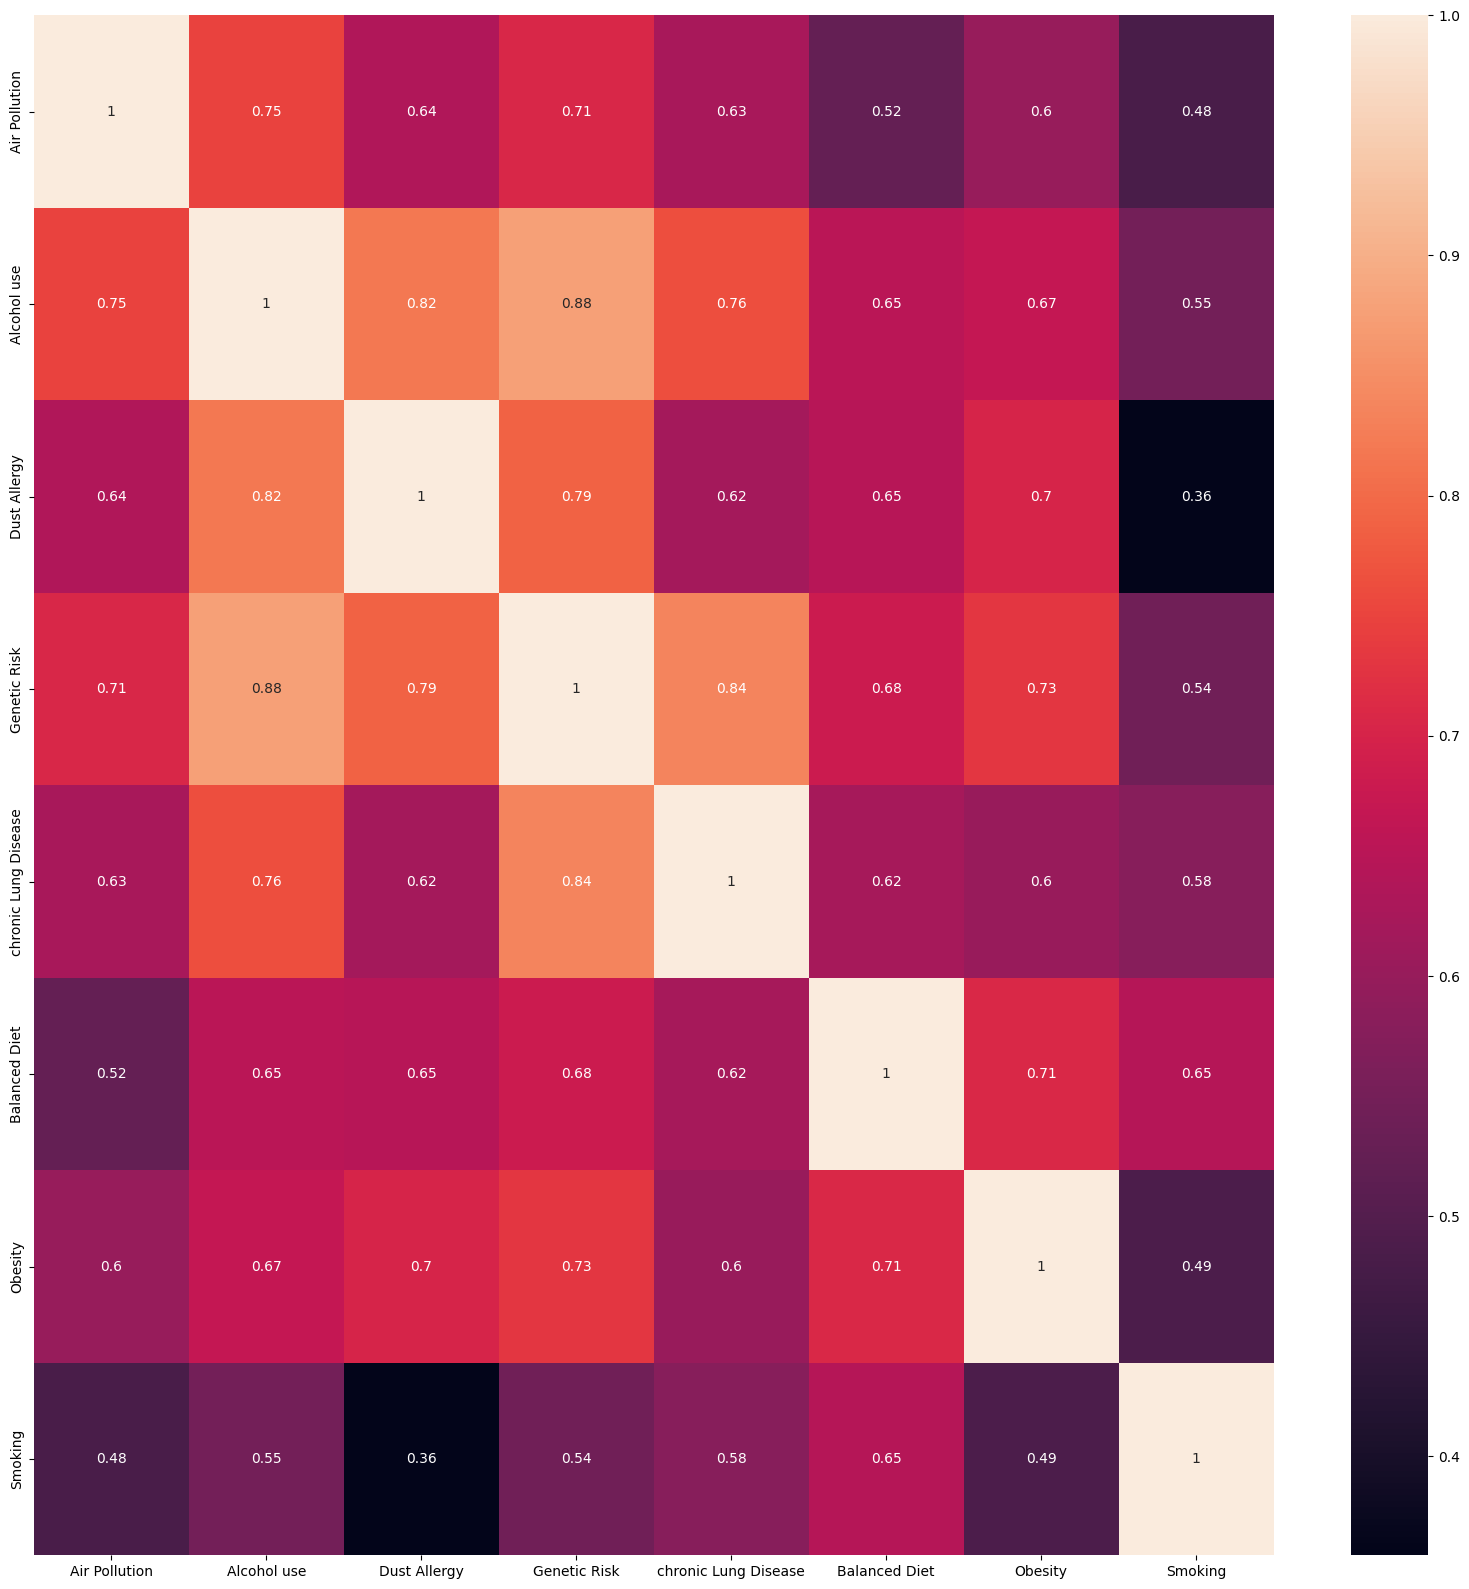

In [7]:
plt.figure(figsize=(20, 20))
corr_matrix = df_X.corr(numeric_only=True)
corr_matrix

sns.heatmap(corr_matrix, annot=True) 

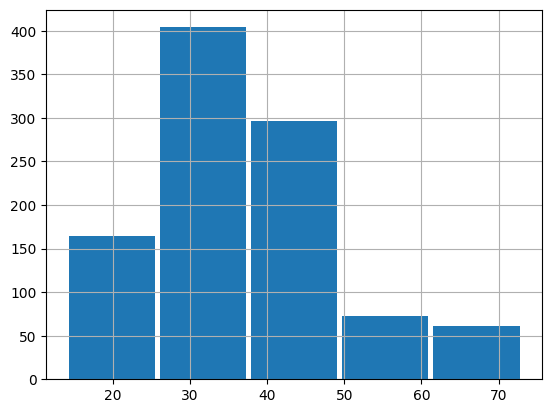

C:\Users\USER\AppData\Local\Temp\ipykernel_63296\273173265.py:35: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_X.replace({'High': 2, 'Medium': 1, 'Low': 0}, inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_63296\273173265.py:36: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_y.replace({'High': 2, 'Medium': 1, 'Low': 0}, inplace=True)


<Axes: >

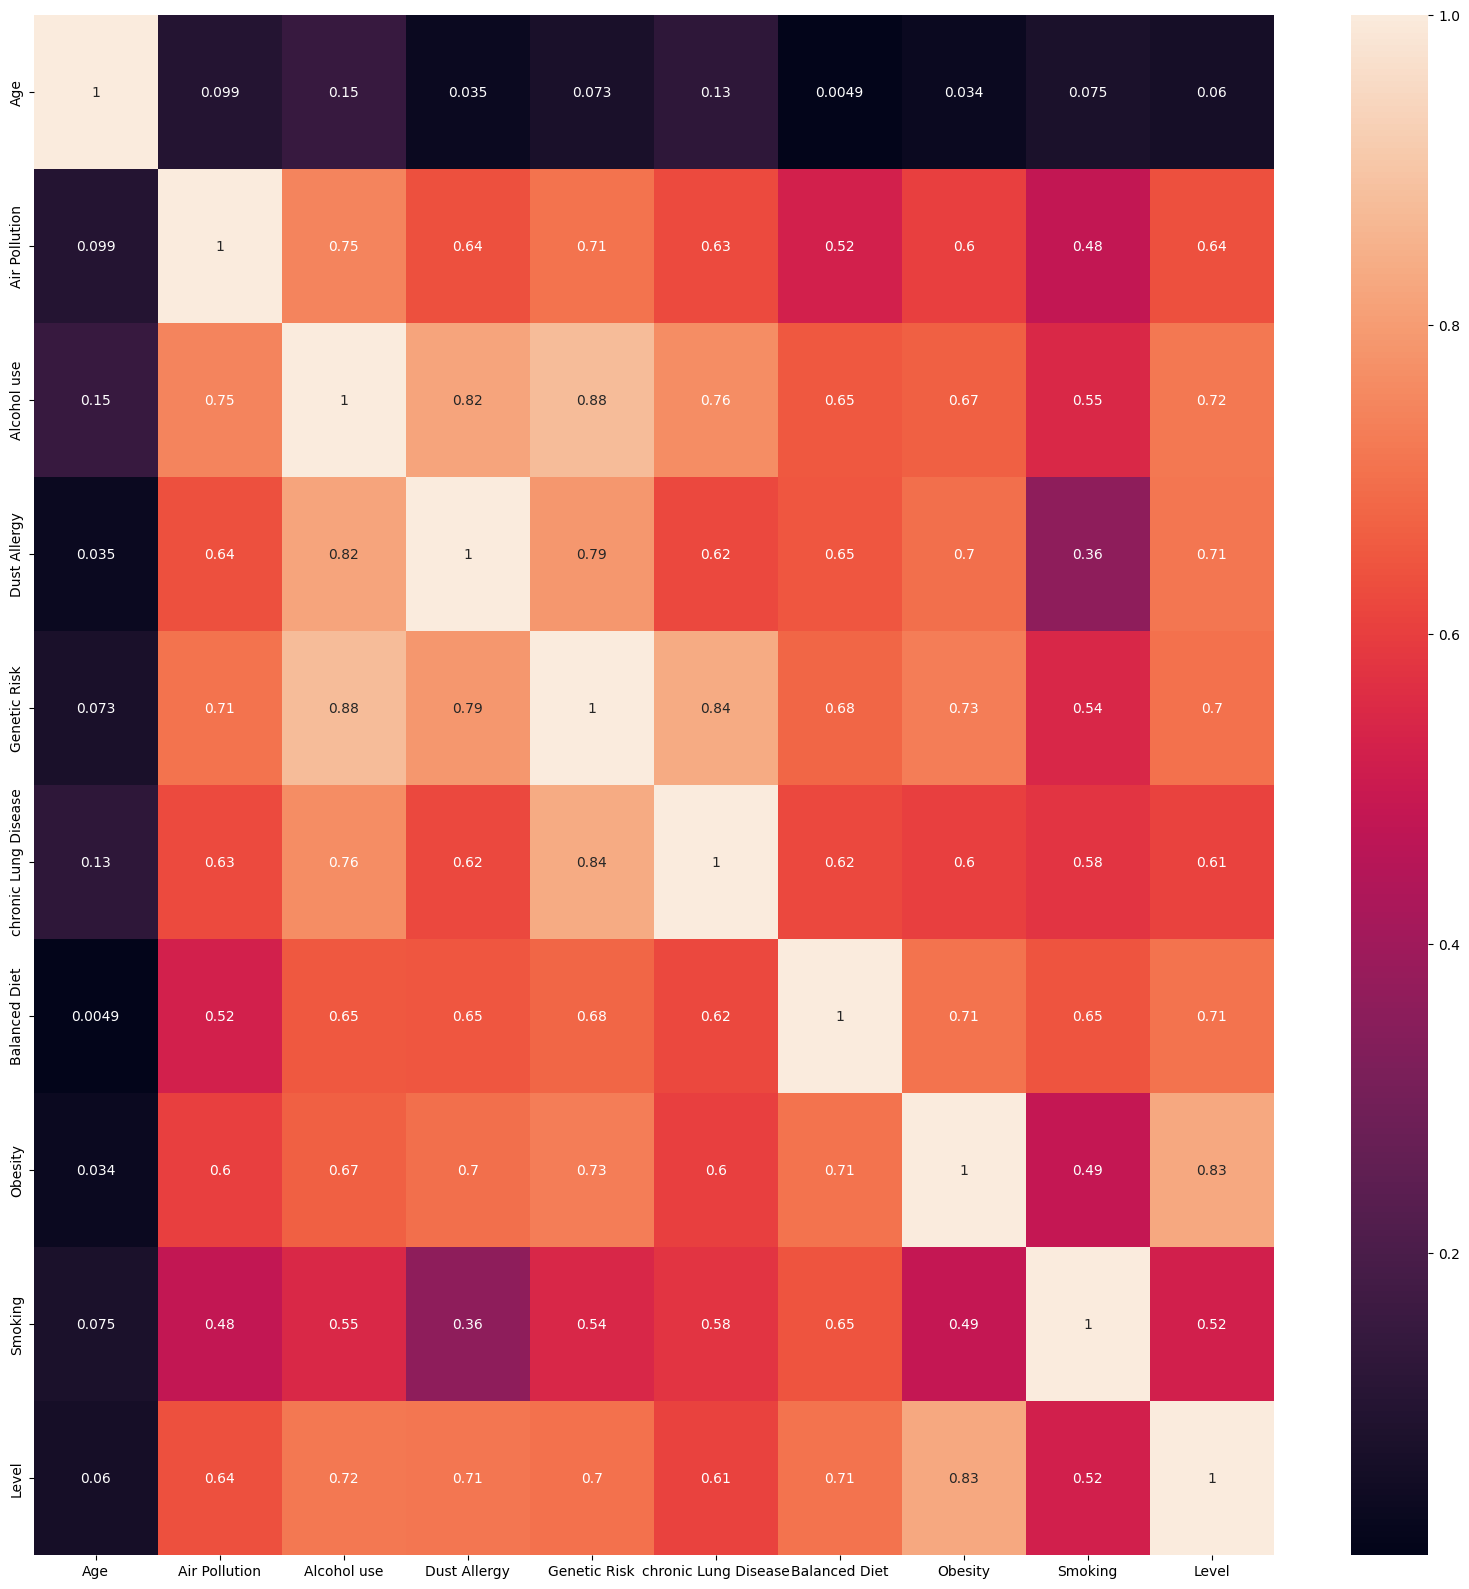

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 1. 데이터 로드
df = pd.read_csv('./data/cancer_patient_data_sets.csv')

# 2. 데이터 구조 및 기초 통계 확인
df.head()

# 3. 결측치 및 이상치 탐색
# 결측치 탐색
df.isnull().sum()   # 결측치 없음 

# 4. 데이터 시각화를 통한 탐색
df['Age'].hist(bins=5, rwidth=0.95)
plt.show()

# 5. 데이터 정제 및 전처리



# 폐암의 환경적 원인이 아닌 특성 drop
df_X = df.drop(['index', 'Patient Id', 'Gender', 'OccuPational Hazards','Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath', 'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold', 'Dry Cough', 'Snoring'], axis=1)
df_y = df['Level']

# Level 컬럼의 High, Low, Medium을 LabelEncoder로 변환 -> 순차적으로 High: 0, Low: 1, Medium: 2 
# LabelEncoder를 사용하면 High > Medium > Low 순서가  0, 2, 1 로 바뀌어버려 상관관계를 보는데에 어려움이 있음.
# encoder = LabelEncoder()
# df['Level'] = encoder.fit_transform(df['Level'])
# 따라서 High, Medium, Low를 직접 변환해주기로 함 ( High: 2, Medium: 1, Low: 1 )
df_X.replace({'High': 2, 'Medium': 1, 'Low': 0}, inplace=True)
df_y.replace({'High': 2, 'Medium': 1, 'Low': 0}, inplace=True)
df_y

plt.figure(figsize=(20, 20))
corr_matrix = df_X.corr(numeric_only=True)
corr_matrix

sns.heatmap(corr_matrix, annot=True) 

- 위의 heatmap에서 도출될 수 있는 인사이트
1. 비만(Obesity) : 0.83
- 폐암 환자들의 비만율이 높은데 이는 비만 자체가 직접적으로 폐암을 유발하는지 아니면 다른 요인들이 비만에 영향을 주어 폐암을 유발하는지에 대한 추가적인 고찰이 필요함

2. 음주(Alcohol Use) : 0.72
- 예상보다 높은 상관관계를 보인다. 음주 자체가 폐암을 유발한다기보다는 생활습관, 혹은 음주가 건강에 미치는 영향이 폐암의 진행을 가속시키는 원인이 될 수 있다고 보는 것이 합리적일 듯 함

3. 먼지 알레르기(Dust Allergy) : 0.71
- 먼지 알레르기가 심한 사람이 폐암이 진행되기 쉬울 수 있음.
- 알레르기가 폐 손상을 진행시키는데에 영향을 줄 수 있다고 생각할 수 있다

4. 유전적 요인(Genetic Risk) : 0.70
- 가족력이 있으면 폐암에 걸릴 확률이 높고, 더욱 심각하게 진행될 가능성이 높으니 가족력이 있다면 조기검진이 중요하다

5. 공기 오염(Air Pollution) : 0.64
- 고공해 지역에 거주할수록 폐암이 더 심각해지는 경향을 보인다
- 미세먼지 혹은 오염물질 등이 주원인일 가능성이 높다
- 오염지역에 거주한다면 정기적인 검진이 필요하다

6. 만성 폐질환(Chronic Lung Disease) : 0.61
- 만성 폐질환을 앓고 있다면 폐암에 걸릴 확률이 높을 뿐만 아니라, 폐암이 더욱 심각하게 진행될 가능성이 크다
- 만성 폐질환을 앓고 있다면 검진의 필요성이 대두된다

7. 균형잡힌 식단(Balanced Diet) : 0.71
- 예상 외로 양의 상관관계를 보인다
- 균형잡힌 식단이 폐암의 진행에 영향을 준다기보다는 환자들이 식단을 조절하게 되며 이런 상관관계가 나타나게 될 가능성이 있다
- 환자의 발병 전후의 식습관 변화에 대한 부분이 고려되어야 한다

8. 흡연(Smoking) : 0.52
- 생각보다 낮은 상관관계를 보인다
- 어..? 펴도 되나? 되겠지? 피자.

9. 나이(Age) : 0.06
- 나이와의 상관관계는 매우 낮다
- 특정 연령층이 아닌 다양한 연령대에서 발병할 수 있다는 것을 의미한다
- 나이에 관계없이 주기적인 검진이 필요하다

<Axes: >

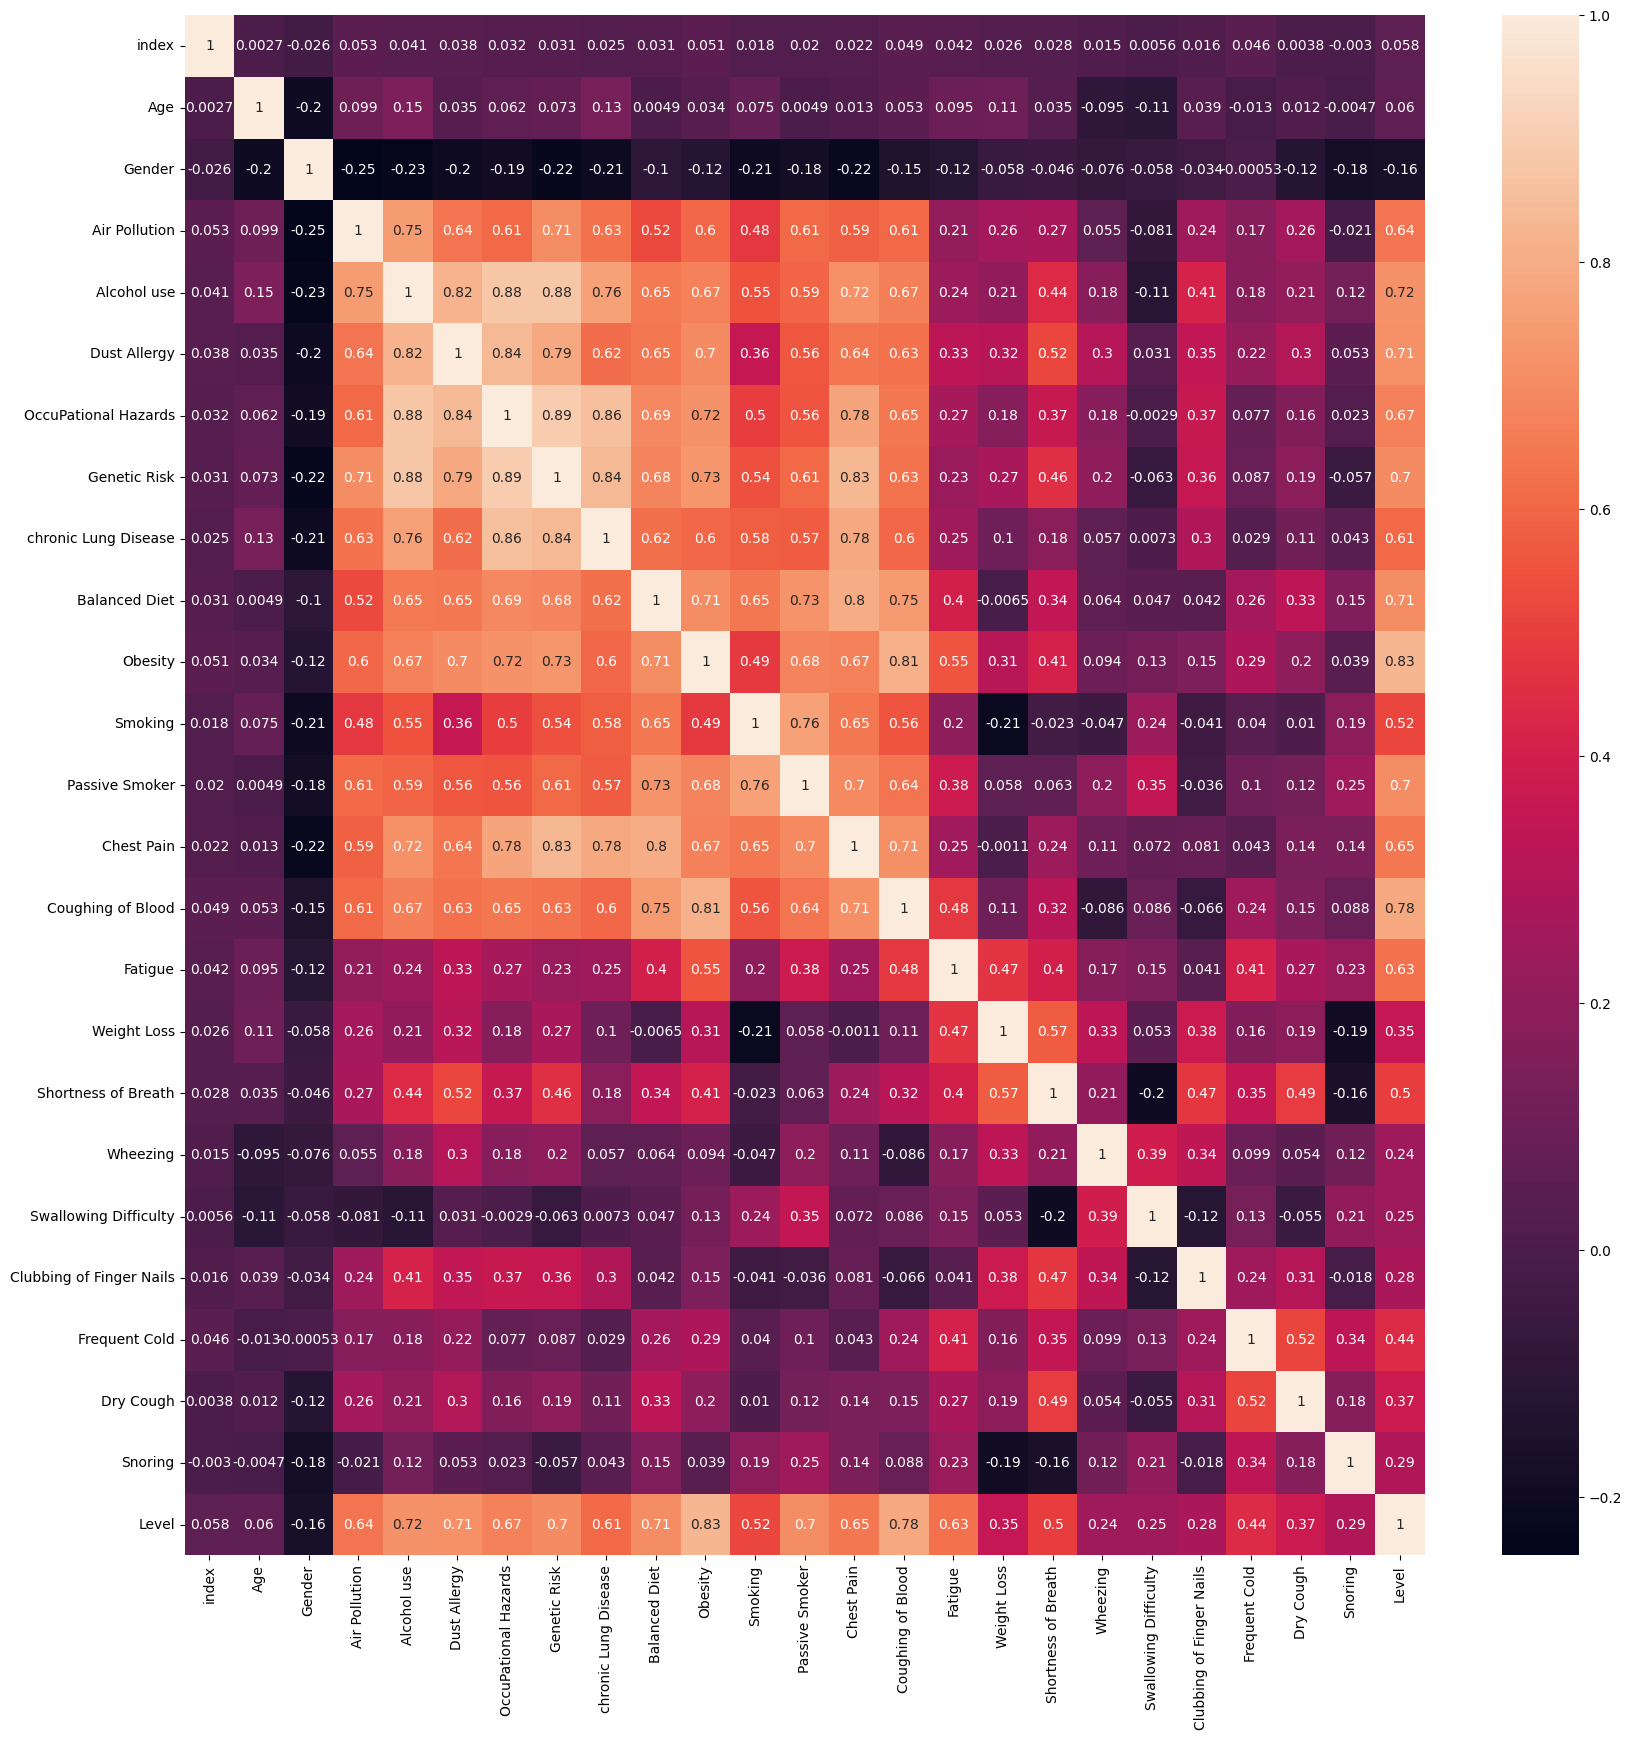

In [9]:
plt.figure(figsize=(20, 20))
corr_matrix = df.corr(numeric_only=True)
corr_matrix

sns.heatmap(corr_matrix, annot=True) 

다른 특성들과의 상관관계

1. 객혈(Coughing of Blood) : 0.78
- 폐암이 진행될수록 증상이 나타날 가능성이 크다
- 폐암의 진행도를 판단하는 중요한 임상지표가 될 수 있음을 시사한다

2. 간접흡연(Passive Smoker) : 0.70
- 간접흡연에 지속적으로 노출될 경우 폐암의 위험이 증가한다
- 간접흡연을 줄이기 위한 정책이 폐암 예방에 중요하다는 점을 시사한다

3. 직업(Occupational Hazards) : 0.67
- 특정 직업군에서 폐암 진행이 심각해지는 경향을 보인다
- 이는 오랜기간 오염물질에 노출도면 폐암 발병, 진행의 위험이 증가한다는 것을 시사한다

4. 가슴 통증(Chest Pain) : 0.65, 피로(Fatigue) : 0.63, 호흡곤란(Shortness of Breath) : 0.5, 마른기침(Dry Cough) : 0.37, 체중감소(Weight Loss) : 0.35
- 폐암이 발병하고 진행되면 해당 증상들이 나타날 가능성이 높음

5. 코골이(Snoring) : 0.29, 곤봉화현상(Clubbing of Finger Nails) : 0.28, 삼킴장애(Swallowing Difficulty) : 0.25, 천명(Wheezing) : 0.24
- 해당 증상들은 연관성이 낮다.

<Axes: >

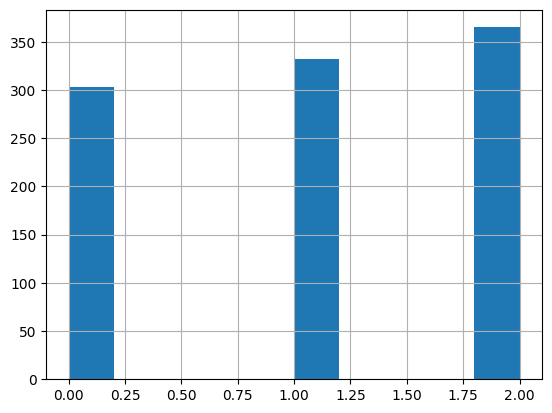

In [10]:
df['Level'].hist()

In [11]:
df_air_6 = df[df['Air Pollution'] == 6]
df_air_6

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,2
10,10,P107,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,2
11,11,P108,64,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,2
13,13,P11,34,1,6,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,2
17,17,P113,34,1,6,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,994,P994,33,1,6,7,7,7,7,7,...,8,5,7,6,7,8,7,6,2,2
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,2
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,2
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,2


In [12]:
df_air_6['OccuPational Hazards'].value_counts()


OccuPational Hazards
7    306
5     20
Name: count, dtype: int64

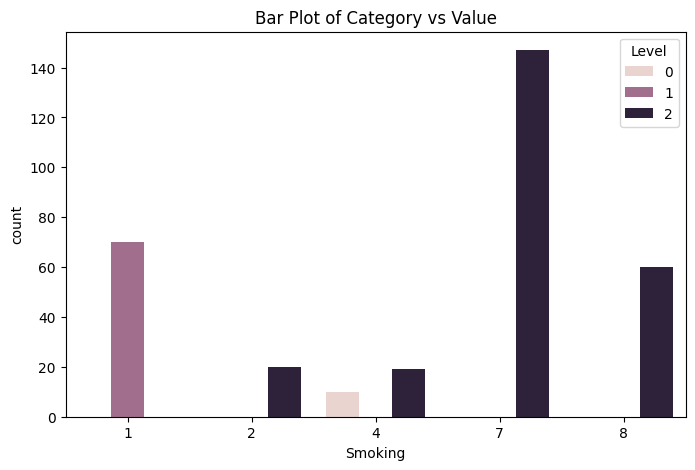

In [13]:
plt.figure(figsize=(8,5))
sns.countplot(x='Smoking',hue='Level', data=df_air_6)

# 그래프 제목 추가
plt.title("Bar Plot of Category vs Value")
plt.show()